## Linear Regressions with StatsModels

Statsmodels is a great library we can use to run regressions. Regressions are used to analyze the relationships between dependent variables. We create a linear regressions by plotting a line that closely matches our data to make predictions on unknown data.

# Describe the Statistics

**Model:** OLS : Ordinary Least Squares is one method for developing a model of linear regression. When developing a model of linear regression, minimize the dependent samples so we can estimate the unknown samples.

**Method:** Least Squares : Minimize residual samples to fit the data to the model.

**R-quared:** how well (or poorly) the regression line fits the data. When this value is 0.5, we know that our model's inputs account for 50% of the observed variance. The ideal correlation level is 1.

**Adj, R-squared:** Describes the model's accuracy. Values range from 0 to 1, where higher values indicate a good fit.

**F-statistic:** Measures how significantly the data points fit into the regression model by measuring variation of sample means. 

**Prob (F-statistic):** Probability that the null hypothesis for the full model is true. Closer to zero the better the samples approach the model.

**Log-Likelihood:** The conditional probability that the observed data fits the model

**AIC:** Adjusts the log-likelihood according to the amount of data and model complexity. It emphasizes the data points that best characterize the data.

**Df Residuals:** Degrees of freedom of the residuals which is the difference between predicted values and the measured data.

**BIC:** We require a low BIC. It prioritizes the shortest description of the data, similar to AIC.

**Df Model:** Number of parameters in the model

**Coefficient Constant:** This is the Y intercept. When both the dependent and independent coefficients are 0, the anticipated output equals the constant coefficient.

**Independent Coefficient:** Represents the change per unit of the independent variable.

**Standard Error:** Accuracy of the coefficients

**P>|t|:** Calculating the P Value, less than 0.05 is statistically significant.

**[.025 - .975]:** Confidence Interval : Represents the expected range within which coefficients will fall.

**Omnibus:** (D’Angostino’s test) : Determines if the samples originate from a population with a normal distribution.

**Durbin-Watson:** Determine if the mistakes are independent. Used to identify repeated patterns that may be obscured by background noise. Its value ranges between 0 and 4. If larger than 2, this indicates that the two variables are moving in opposite directions (negatively correlated). If fewer than two variables have a positive correlation.

**Prob(Omnibus):** Probability of Omnibus

**Jarque-Bera:** Determines if the samples follow a normal distribution. It never has a negative value, and its distance from zero indicates that the data does not follow a normal distribution. 

**Skew:** The asymmetry of the probability distribution's measurement. Negative skew denotes that the tail is longer on the left while the data is concentrated on the right. A positive result shows the right tail is longer. 0 means that the tails are evenly distributed.

**Prob(JB):** The probability of Jarque-Bera

**Kurtosis:** Focuses on the tails of a probability distribution rather than the peak when describing its form. If the value is high, there are a greater number of outliers. If the value is less than 3, fewer outliers are present. A value of 3 that is consistent with a normal distribution. Greater than three values suggest more outliers.

**Condition Number:** Indicates whether or not samples are highly connected in our regression model. A big value signifies substantial multicollinearity, which shows that independent variables are highly associated with one another. This raises issues because a tiny number of samples are so drastically different from the others that the results are tainted.

### Imports

In [1]:
#!pip install statsmodels

In [2]:
# Provides numerous math functions related to linear algebra and more
import numpy as np
# Provides numerous tools for manipulating tabular data and more
import pandas as pd
# Used to create static and interactive graphical data plots
import matplotlib.pyplot as plt
%matplotlib inline
# Provides numerous tools related to statistical data analysis
import statsmodels.api as sm
# Seaborn extends the capabilities of Matplotlib
import seaborn as sns

### Exploring Data

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 beauty   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     17.08
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           4.25e-05
Time:                        09:33:42   Log-Likelihood:                -538.11
No. Observations:                 463   AIC:                             1080.
Df Residuals:                     461   BIC:                             1088.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0743      0.262     -4.094      0.000      -1.590      -0.559
eval           0.2687      0.065      4.133      0.000       0.141       0.396
==============================================================================
Omnibus:                       25.836   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.678
Skew:                           0.512   Prob(JB):                     4.38e-06
Kurtosis:                       2.518   Cond. No.                         31.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

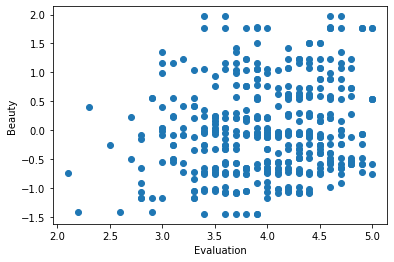

In [3]:
# You can use R datasets
# Load beauty data and a list of the required dataname data
# https://vincentarelbundock.github.io/Rdatasets/datasets.html
beauty = sm.datasets.get_rdataset("TeachingRatings", "AER")

# Get overview of the Dataframe
# print(beauty.__doc__)

# Teacher evaluation data along with data on the professors 
# minority status, age, gender, credits, beauty rating, and
# other data
beauty.data.head()

# Get count, mean, standard deviation, min, max and averages 
# for different percentiles
beauty.data.describe()

# Create a scatter plot which predicts whether the perceived
# beauty of the instructor has anything to do with teacher
# evaluations

# 1st 5 rows of data
beauty.data.head()

y = beauty.data['beauty']
x1 = beauty.data['eval']
plt.scatter(x1, y)
plt.xlabel('Evaluation')
plt.ylabel('Beauty')

# Define the intercept to the y line
x = sm.add_constant(x1)

# OLS Ordinary Least Squares : Estimates the data so a line can 
# be drawn through data points
results = sm.OLS(y,x).fit()
results.summary()

### Plot Regression Line

Text(0, 0.5, 'Beauty')

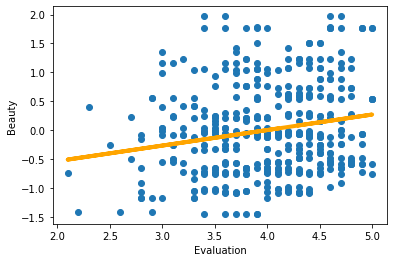

In [4]:
plt.scatter(x1, y)
plt.xlabel('Evaluation')
plt.ylabel('Beauty')

# Create the regression line
yhat = 0.2687 * x1 - 1.0743
fig = plt.plot(x1, yhat, lw=4, c='orange', label='regression')
plt.xlabel('Evaluation')
plt.ylabel('Beauty')

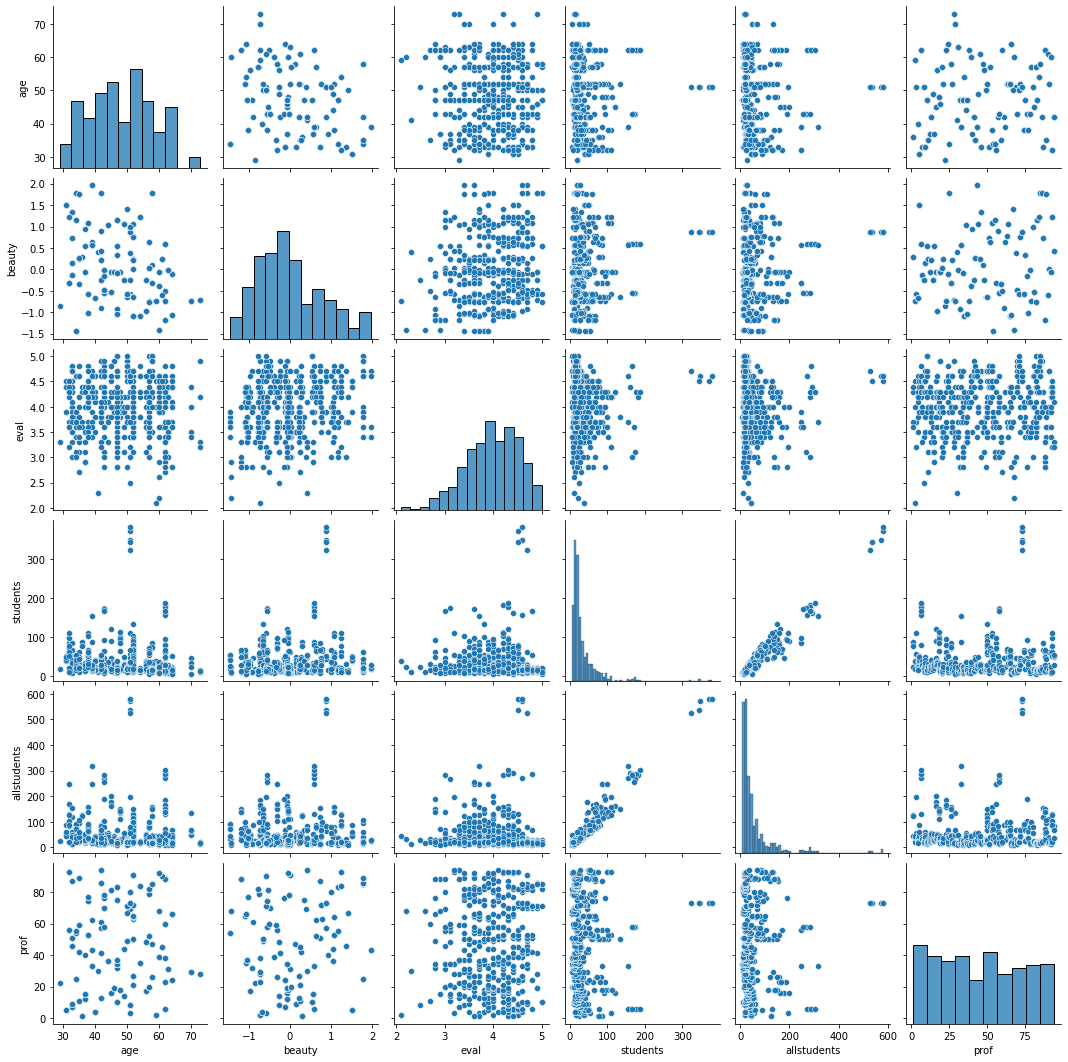

In [5]:
sns.pairplot(beauty.data)

<AxesSubplot:xlabel='eval', ylabel='beauty'>

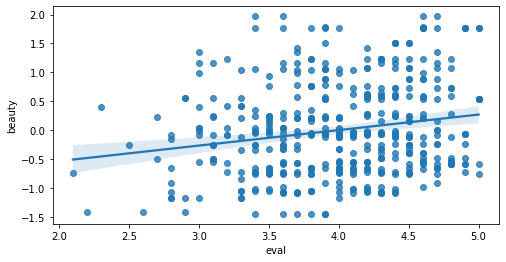

In [6]:
plt.figure(figsize=(8,4))
sns.regplot(x="eval", y="beauty", data=beauty.data)

### Analyzing Tip Amounts

In [7]:
# Load tip dataset
tips = sns.load_dataset("tips")
# Get column data in dataset
tips.columns

y = tips['total_bill']
x1 = tips['tip']

# Define the intercept to the y line
x = sm.add_constant(x1)

# OLS Ordinary Least Squares : Estimates the data so a line can 
# be drawn through data points
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sat, 13 Aug 2022   Prob (F-statistic):           6.69e-34
Time:                        09:33:44   Log-Likelihood:                -804.77
No. Observations:                 244   AIC:                             1614.
Df Residuals:                     242   BIC:                             1621.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7503      1.006      6.707      0.000       4.768       8.733
tip            4.3477      0.305     14.260      0.000       3.747       4.948
==============================================================================
Omnibus:                       58.831   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.799
Skew:                           1.185   Prob(JB):                     5.87e-27
Kurtosis:                       5.502   Cond. No.                         8.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Tips Regression Line

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

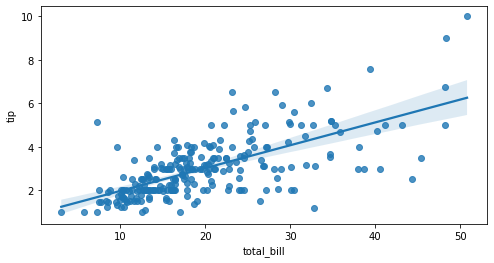

In [8]:
plt.figure(figsize=(8,4))
sns.regplot(x="total_bill", y="tip", data=tips)